<a href="https://colab.research.google.com/github/ibonetc/Esp_IA/blob/main/DeepLearning/IA_ML_Example_Classifiers_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de KNN con la base de datos Iris

Ahora descargue la base de datos de iris y súbala a los archivos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
dataframe = pd.read_csv("/content/drive/MyDrive/Datasets/iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [6]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 40, 40]))
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10, 10, 10]))


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.9666666666666667
1.0


In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_pred = knn.predict(X_test)

In [12]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,10,0,10
Iris-virginica,0,0,10,10
All,10,10,10,30


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
y_train_pred=knn.predict(X)
print(classification_report(Y,y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [15]:
y_pred_proba=knn.predict_proba(X)
y_pred_proba

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

In [16]:
neighbors = np.arange(1,15)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

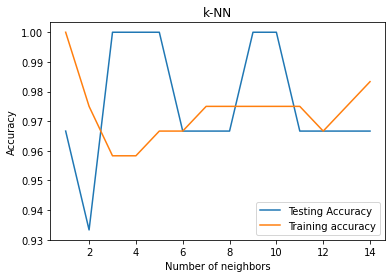

In [17]:
plt.title('k-NN')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [19]:
knn.score(X,Y)

0.98

In [20]:
knn.predict([[0.8, 1,0.6,3]])

array(['Iris-setosa'], dtype=object)

In [21]:
knn.predict_proba([[0.8, 1,0.6,3]])

array([[1., 0., 0.]])

Para probar parámetros como en el K-NN la K, se puede también utilizar la siguiente función

In [22]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

In [24]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.975 {'n_neighbors': 5}


## Validación Cruzada

In [81]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [83]:
scoring = ['precision_macro', 'recall_macro','f1_macro']
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
accuracy = cross_val_score(knn, X, Y, cv=10)
scores = cross_validate(knn, X,Y, scoring=scoring, cv=10)

In [26]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [84]:
accuracy

array([1.  , 0.93, 1.  , 1.  , 0.87, 0.93, 0.93, 1.  , 1.  , 1.  ])

In [27]:
print(accuracy.mean())
scores['test_recall_macro'].mean()

0.9733333333333334


0.9733333333333333

Para el resto de los clasificadores use:

MLP: from sklearn.neural_network import MLPClassifier
SVM: from sklearn import svm

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=10, random_state=1,max_iter=1000)


In [29]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
scoring = ['recall_macro']
score_mlp=cross_validate(mlp, X,Y, scoring=scoring, cv=10)
accuracy = cross_val_score(mlp, X, Y, cv=10)


In [31]:
print(score_mlp['test_recall_macro'].mean())
print(accuracy.mean())


0.9799999999999999
0.9800000000000001


In [ ]:
#from warnings import filterwarnings
#filterwarnings('ignore')

from sklearn.exceptions import ConvergenceWarning 
ConvergenceWarning('ignore')
param_grid = {'hidden_layer_sizes':np.arange(2,20)}
mlp = MLPClassifier(alpha=1e-5,random_state=1)
mlp_cv= GridSearchCV(mlp,param_grid,cv=10,n_jobs=-1)
mlp_cv.fit(X,Y)

In [36]:
print(mlp_cv.best_score_,mlp_cv.best_params_)

0.9600000000000002 {'hidden_layer_sizes': 11}


In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [73]:
mlp = MLPClassifier(hidden_layer_sizes=11, alpha=1e-5,random_state=1)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=11, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [74]:
y_predict=mlp.predict(X_test)

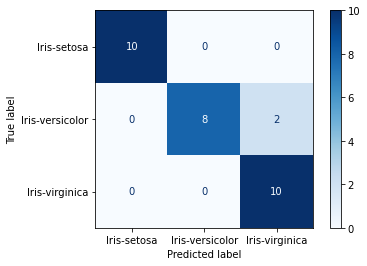

In [76]:
plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

### Usando KFold o StratifiedKFold

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=11, alpha=1e-5,random_state=1)

In [47]:
from statistics import mean, stdev

In [48]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for train_index, test_index in kfold:
  X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
  y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
  mlp.fit(X_train_cv, y_train_cv)
  scores.append(mlp.score(X_test_cv,y_test_cv))
accuracy=mean(scores)*100
accuracy

96.66666666666667

In [85]:
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
predicted_y=np.array([])
real_y=np.array([])
for train_index, test_index in kfold:
  X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
  y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
  mlp.fit(X_train_cv, y_train_cv)
  scores.append(mlp.score(X_test_cv,y_test_cv))
  py=mlp.predict(X_test_cv)
  predicted_y=np.append(predicted_y,py)
  real_y=np.append(real_y,y_test_cv)
accuracy=mean(scores)*100
accuracy

96.66666666666667

In [86]:
from sklearn.metrics import confusion_matrix

In [88]:
classes=np.unique(y_train)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [68]:
import itertools

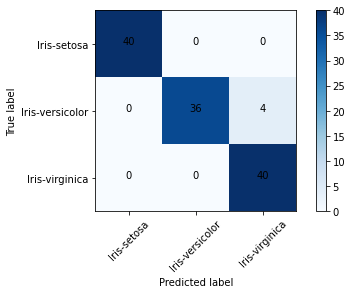

In [87]:
cnf_matrix = confusion_matrix(real_y, predicted_y)
np.set_printoptions(precision=2)
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'), horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVR

In [ ]:
#Diferentes kernels de SVM
svm=svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_lin = SVR(kernel='linear', C=100, gamma='auto')
svm_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)